## Global Temperature data 1850 - 2015
Unless otherwise noted temperatures in fahrenheit and CO2 thousands metric tons will be displayed in separate charts because of scale differences.

Global temperatures data consists of the by month land average, land max average, land min average, land ocean average, and a level of uncertainty for each of the temperatures from 1850 - 2015.  When viewing the global temperature multi-plot chart, the plot lines do look like they are trending upwards over time, so it is reasonable to look at this and be able to say that the temperatures are trending in a positive upwards direction.  However, to take a look from a different point of view, we created scatter plots with linear regression lines, and these plots confirmed what we were seeing in the multi-plot chart, but we are better able to see the structure and positive trend of the individual temperature data points alongside the linear regression line.  The global temperature charts together show the upward trending aspect of our hypothesis.  You can click on any of the scatter plots to get a closer view, and you can see that all the linear regression lines have a positive upward trend but not a steep or extreme upward trend.

## Temperature Data Source:
* Data.World: https://data.world/data-society/global-climate-change-data
* Original Data Source:
* Kaggle: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
* Berkeley Earth Raw data:  http://berkeleyearth.org/data/
* Explains their data cleansing process: http://berkeleyearth.org/about-data-set/

In [27]:
import pandas as pd
import numpy as np
import scipy as sp
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates
import seaborn as sns
# Set my default color palette
mycolors = ["royalblue", "blue", "red", "green", "cyan", "orange", 
            "purple", "olive", "limegreen", "magenta", ]
sns.set_palette(mycolors)

In [28]:
# Store filepath in a variable: use parse_dates=["date"] 
# encoding="ISO-8859-1"
gllo = "./data/clean/clean_GlobalLandOceanTemps.csv"

# Read our Data file with the pandas library
gllo_df = pd.read_csv(gllo,parse_dates=["g_m_date"])
print(len(gllo_df.index))
gllo_df.info()

1992
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 13 columns):
g_m_date                        1992 non-null datetime64[ns]
g_land_avg_tempf                1992 non-null float64
g_land_avg_tempc                1992 non-null float64
g_land_avg_temp_uncert          1992 non-null float64
g_land_max_tempf                1992 non-null float64
g_land_max_tempc                1992 non-null float64
g_land_max_temp_uncert          1992 non-null float64
g_land_min_tempf                1992 non-null float64
g_land_min_tempc                1992 non-null float64
g_land_min_temp_uncert          1992 non-null float64
g_land_ocean_avg_tempf          1992 non-null float64
g_land_ocean_avg_tempc          1992 non-null float64
g_land_ocean_avg_temp_uncert    1992 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 202.4 KB


In [29]:
gllo_df.head(5)

,g_m_date,g_land_avg_tempf,g_land_avg_tempc,g_land_avg_temp_uncert,g_land_max_tempf,g_land_max_tempc,g_land_max_temp_uncert,g_land_min_tempf,g_land_min_tempc,g_land_min_temp_uncert,g_land_ocean_avg_tempf,g_land_ocean_avg_tempc,g_land_ocean_avg_temp_uncert
0,1850-01-01,33.3482,0.749,1.105,46.8356,8.242,1.738,26.2292,-3.206,2.822,55.0994,12.833,0.367
1,1850-02-01,37.5278,3.071,1.275,49.9460,9.970,3.007,27.8762,-2.291,1.623,56.4584,13.588,0.414
2,1850-03-01,40.9172,4.954,0.955,50.6246,10.347,2.401,28.5710,-1.905,1.410,57.2774,14.043,0.341
3,1850-04-01,44.9906,7.217,0.665,55.2812,12.934,1.004,33.8324,1.018,1.329,58.4006,14.667,0.267
4,1850-05-01,50.0072,10.004,0.617,60.1790,15.655,2.406,38.8598,3.811,1.347,59.9126,15.507,0.249


In [30]:
# Get the min and max date range
gllo_min_date = gllo_df["g_m_date"].min()
gllo_max_date = gllo_df["g_m_date"].max()
print("min year " + datetime.strftime(gllo_min_date, '%Y-%m-%d') + " max year " + \
      datetime.strftime(gllo_max_date, '%Y-%m-%d'))

min year 1850-01-01 max year 2015-12-01


In [31]:
gllo_df.corr()

,g_land_avg_tempf,g_land_avg_tempc,g_land_avg_temp_uncert,g_land_max_tempf,g_land_max_tempc,g_land_max_temp_uncert,g_land_min_tempf,g_land_min_tempc,g_land_min_temp_uncert,g_land_ocean_avg_tempf,g_land_ocean_avg_tempc,g_land_ocean_avg_temp_uncert
g_land_avg_tempf,1.000000,1.000000,-0.143129,0.995807,0.995807,-0.108462,0.995611,0.995611,-0.167451,0.988066,0.988066,-0.131412
g_land_avg_tempc,1.000000,1.000000,-0.143129,0.995807,0.995807,-0.108462,0.995611,0.995611,-0.167451,0.988066,0.988066,-0.131412
g_land_avg_temp_uncert,-0.143129,-0.143129,1.000000,-0.132905,-0.132905,0.866944,-0.165066,-0.165066,0.888717,-0.208008,-0.208008,0.972405
g_land_max_tempf,0.995807,0.995807,-0.132905,1.000000,1.000000,-0.105349,0.993404,0.993404,-0.160020,0.983855,0.983855,-0.120563
g_land_max_tempc,0.995807,0.995807,-0.132905,1.000000,1.000000,-0.105349,0.993404,0.993404,-0.160020,0.983855,0.983855,-0.120563
g_land_max_temp_uncert,-0.108462,-0.108462,0.866944,-0.105349,-0.105349,1.000000,-0.123251,-0.123251,0.868702,-0.163396,-0.163396,0.860425
g_land_min_tempf,0.995611,0.995611,-0.165066,0.993404,0.993404,-0.123251,1.000000,1.000000,-0.185512,0.986402,0.986402,-0.154931
g_land_min_tempc,0.995611,0.995611,-0.165066,0.993404,0.993404,-0.123251,1.000000,1.000000,-0.185512,0.986402,0.986402,-0.154931
g_land_min_temp_uncert,-0.167451,-0.167451,0.888717,-0.160020,-0.160020,0.868702,-0.185512,-0.185512,1.000000,-0.221746,-0.221746,0.880062
g_land_ocean_avg_tempf,0.988066,0.988066,-0.208008,0.983855,0.983855,-0.163396,0.986402,0.986402,-0.221746,1.000000,1.000000,-0.203072


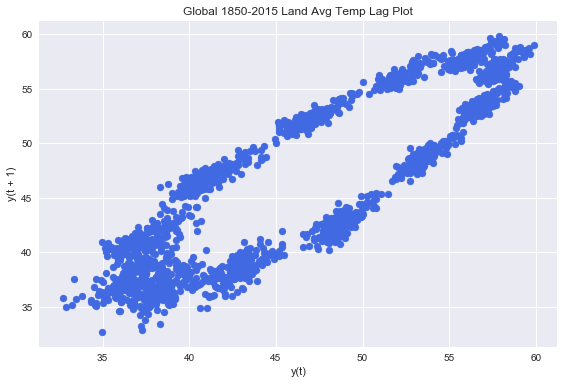

In [32]:
from pandas.plotting import lag_plot

plt.figure()
data = gllo_df["g_land_avg_tempf"]
lag_plot(data)
plt.title("Global 1850-2015 Land Avg Temp Lag Plot")
plt.tight_layout()
plt.savefig("./images/lag-plot_lndavg_tmpf.png")
plt.show()

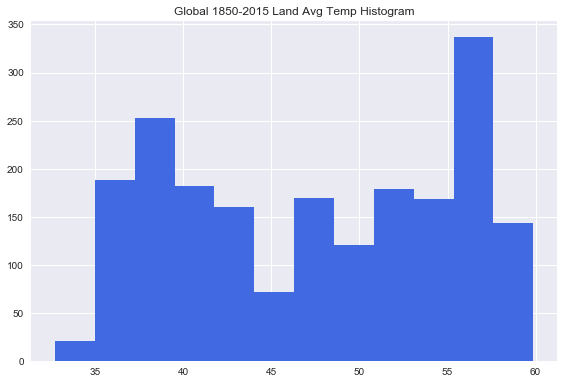

In [33]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(gllo_df["g_land_avg_tempf"]) 
plt.hist(a, bins='auto') 
plt.title("Global 1850-2015 Land Avg Temp Histogram")
plt.tight_layout()
plt.savefig("./images/global_lnd_avg_tmpf_histogram.png") 
plt.show()

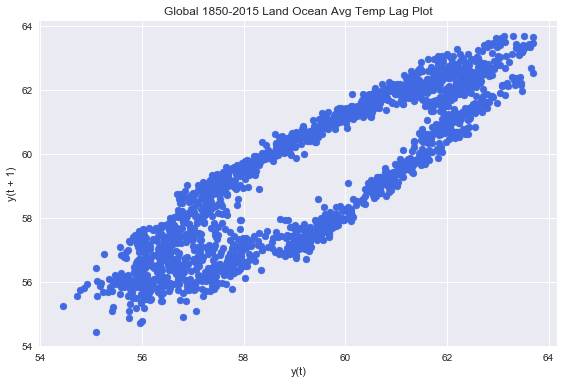

In [34]:
from pandas.plotting import lag_plot

plt.figure()
data = gllo_df["g_land_ocean_avg_tempf"]
lag_plot(data)
plt.title("Global 1850-2015 Land Ocean Avg Temp Lag Plot")
plt.tight_layout()
plt.savefig("./images/lag-plot_lndoceanavg_tmpf.png")
plt.show()

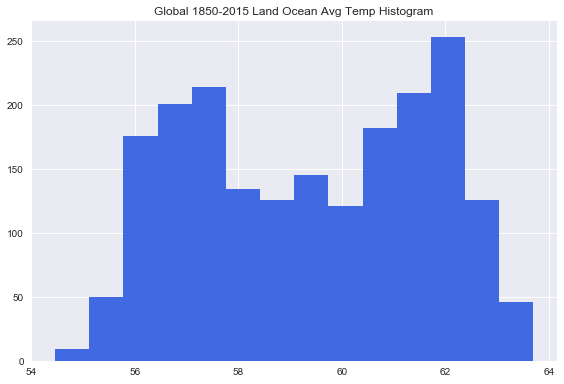

In [35]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(gllo_df["g_land_ocean_avg_tempf"]) 
plt.hist(a, bins='auto') 
plt.title("Global 1850-2015 Land Ocean Avg Temp Histogram")
plt.tight_layout()
plt.savefig("./images/global_lnd_ocn_avg_tmpf_histogram.png") 
plt.show()

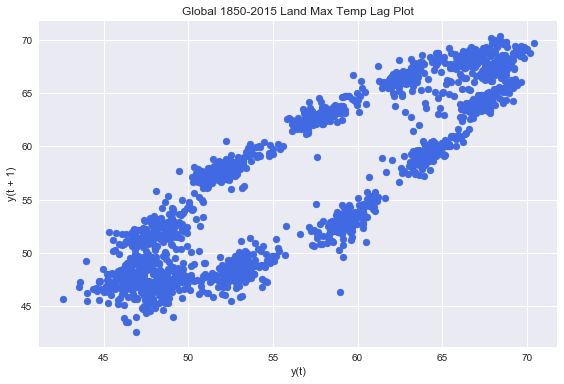

In [36]:
from pandas.plotting import lag_plot

plt.figure()
data = gllo_df["g_land_max_tempf"]
lag_plot(data)
plt.title("Global 1850-2015 Land Max Temp Lag Plot")
plt.tight_layout()
plt.savefig("./images/lag-plot_lndmax_tmpf.png")
plt.show()

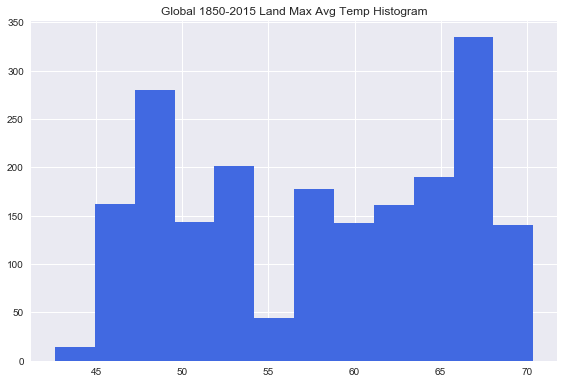

In [37]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(gllo_df["g_land_max_tempf"]) 
plt.hist(a, bins='auto') 
plt.title("Global 1850-2015 Land Max Avg Temp Histogram")
plt.tight_layout()
plt.savefig("./images/global_lnd_max_avg_tmpf_histogram.png") 
plt.show()

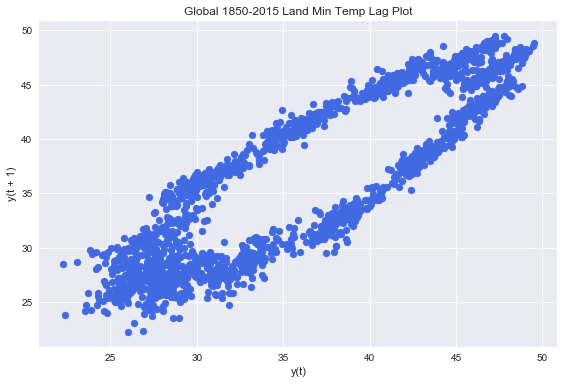

In [38]:
from pandas.plotting import lag_plot

plt.figure()
data = gllo_df["g_land_min_tempf"]
lag_plot(data)
plt.title("Global 1850-2015 Land Min Temp Lag Plot")
plt.tight_layout()
plt.savefig("./images/lag-plot_lndmin_tmpf.png")
plt.show()

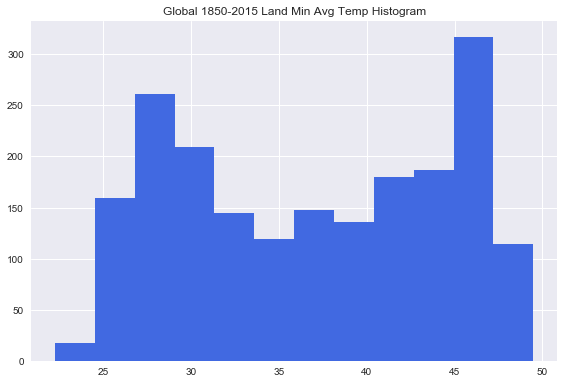

In [39]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(gllo_df["g_land_min_tempf"]) 
plt.hist(a, bins='auto') 
plt.title("Global 1850-2015 Land Min Avg Temp Histogram")
plt.tight_layout()
plt.savefig("./images/global_lnd_min_avg_tmpf_histogram.png") 
plt.show()

In [40]:
# create a year column for grouping
gllo_df["year"] = gllo_df["g_m_date"].dt.year
print(len(gllo_df.index))
gllo_df.head(5)

1992


,g_m_date,g_land_avg_tempf,g_land_avg_tempc,g_land_avg_temp_uncert,g_land_max_tempf,g_land_max_tempc,g_land_max_temp_uncert,g_land_min_tempf,g_land_min_tempc,g_land_min_temp_uncert,g_land_ocean_avg_tempf,g_land_ocean_avg_tempc,g_land_ocean_avg_temp_uncert,year
0,1850-01-01,33.3482,0.749,1.105,46.8356,8.242,1.738,26.2292,-3.206,2.822,55.0994,12.833,0.367,1850
1,1850-02-01,37.5278,3.071,1.275,49.9460,9.970,3.007,27.8762,-2.291,1.623,56.4584,13.588,0.414,1850
2,1850-03-01,40.9172,4.954,0.955,50.6246,10.347,2.401,28.5710,-1.905,1.410,57.2774,14.043,0.341,1850
3,1850-04-01,44.9906,7.217,0.665,55.2812,12.934,1.004,33.8324,1.018,1.329,58.4006,14.667,0.267,1850
4,1850-05-01,50.0072,10.004,0.617,60.1790,15.655,2.406,38.8598,3.811,1.347,59.9126,15.507,0.249,1850


In [41]:
# Create a yearly average for global temperatures
gllo_avg_df = gllo_df.groupby(["year"],\
              as_index=False)["g_land_avg_tempf","g_land_max_tempf",
              "g_land_min_tempf","g_land_ocean_avg_tempf"].mean().\
              rename(columns={"g_land_avg_tempf": "ylylndavg_tmpf",
                        "g_land_max_tempf": "ylylndmax_tmpf",
                        "g_land_min_tempf": "ylylndmin_tmpf",
                        "g_land_ocean_avg_tempf": "ylylndocnavg_tmpf"})        
gllo_avg_df.head(5)

,year,ylylndavg_tmpf,ylylndmax_tmpf,ylylndmin_tmpf,ylylndocnavg_tmpf
0,1850,46.22120,56.25800,35.53580,58.7609
1,1851,46.72145,55.54580,35.96705,58.9853
2,1852,46.58030,56.11520,36.20660,59.0117
3,1853,46.47530,56.99585,35.40650,58.9193
4,1854,46.77890,57.15935,35.17190,58.9838


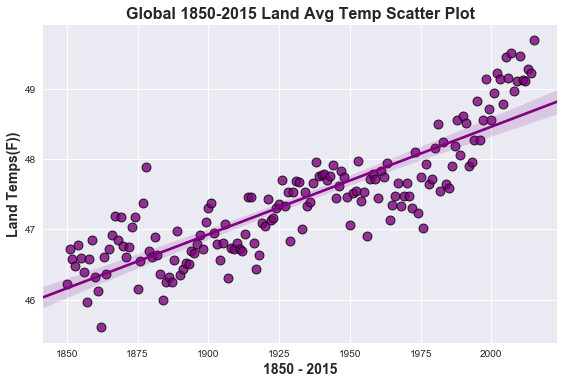

In [42]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# import seaborn as sns; sns.set(color_codes=True)

import seaborn as sns

x_axis = gllo_avg_df["year"]  
y_axis = gllo_avg_df["ylylndavg_tmpf"]

sns.regplot(x=x_axis, y=y_axis, color="purple", marker="o", fit_reg=True, 
            scatter_kws={"s":80, "linewidths":1, "edgecolor":"k"})

sns.set_style("darkgrid")
sns.plt.title("Global 1850-2015 Land Avg Temp Scatter Plot", weight='bold').set_fontsize('16')
sns.plt.xlabel("1850 - 2015", weight='bold').set_fontsize('14')
sns.plt.ylabel("Land Temps(F))", weight='bold',).set_fontsize('14')

plt.tight_layout()
plt.savefig("./images/global_land_tmpf_scatter.png",bbox_inches="tight")
plt.show()

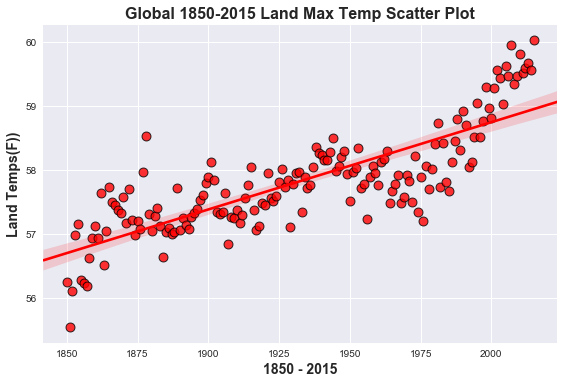

In [43]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# import seaborn as sns; sns.set(color_codes=True)

import seaborn as sns

x_axis = gllo_avg_df["year"]  
y_axis = gllo_avg_df["ylylndmax_tmpf"]

sns.regplot(x=x_axis, y=y_axis, color="red", marker="o", fit_reg=True, 
            scatter_kws={"s":80, "linewidths":1, "edgecolor":"k"})

sns.set_style("darkgrid")
sns.plt.title("Global 1850-2015 Land Max Temp Scatter Plot", weight='bold').set_fontsize('16')
sns.plt.xlabel("1850 - 2015", weight='bold').set_fontsize('14')
sns.plt.ylabel("Land Temps(F))", weight='bold',).set_fontsize('14')

plt.tight_layout()
plt.savefig("./images/global_land_max_tmpf_scatter.png",bbox_inches="tight")
plt.show()

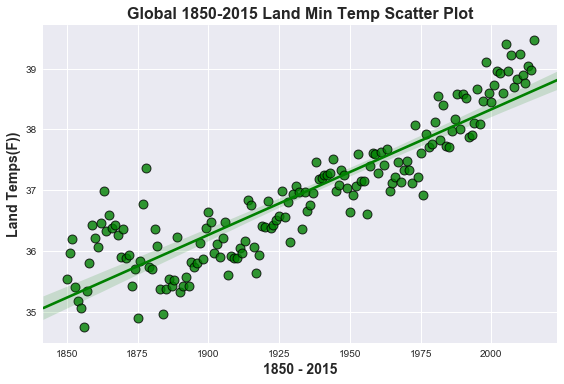

In [44]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# import seaborn as sns; sns.set(color_codes=True)

import seaborn as sns

x_axis = gllo_avg_df["year"]  
y_axis = gllo_avg_df["ylylndmin_tmpf"]

sns.regplot(x=x_axis, y=y_axis, color="green", marker="o", fit_reg=True, 
            scatter_kws={"s":80, "linewidths":1, "edgecolor":"k"})

sns.set_style("darkgrid")
sns.plt.title("Global 1850-2015 Land Min Temp Scatter Plot", weight='bold').set_fontsize('16')
sns.plt.xlabel("1850 - 2015", weight='bold').set_fontsize('14')
sns.plt.ylabel("Land Temps(F))", weight='bold',).set_fontsize('14')

plt.tight_layout()
plt.savefig("./images/global_land_min_tmpf_scatter.png",bbox_inches="tight")
plt.show()

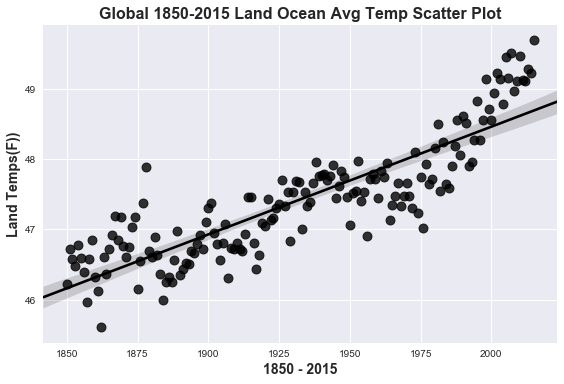

In [45]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# import seaborn as sns; sns.set(color_codes=True)

import seaborn as sns

x_axis = gllo_avg_df["year"]  
y_axis = gllo_avg_df["ylylndavg_tmpf"]

sns.regplot(x=x_axis, y=y_axis, color="black", marker="o", fit_reg=True, 
            scatter_kws={"s":80, "linewidths":1, "edgecolor":"k"})

sns.set_style("darkgrid")
sns.plt.title("Global 1850-2015 Land Ocean Avg Temp Scatter Plot", weight='bold').set_fontsize('16')
sns.plt.xlabel("1850 - 2015", weight='bold').set_fontsize('14')
sns.plt.ylabel("Land Temps(F))", weight='bold',).set_fontsize('14')

plt.tight_layout()
plt.savefig("./images/global_land_ocean_tmpf_scatter.png",bbox_inches="tight")
plt.show()

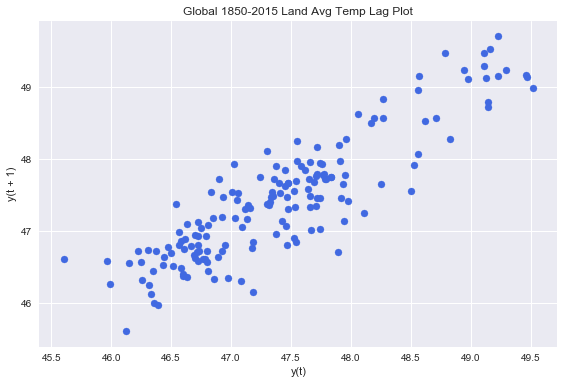

In [46]:
from pandas.plotting import lag_plot

plt.figure()
data = gllo_avg_df["ylylndavg_tmpf"]
lag_plot(data)
plt.title("Global 1850-2015 Land Avg Temp Lag Plot")
plt.tight_layout()
plt.savefig("./images/gallo_lag-plot_lndavg_tmpf.png")
plt.show()

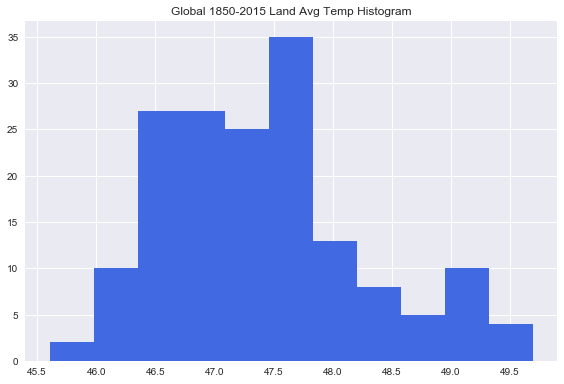

In [47]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(gllo_avg_df["ylylndavg_tmpf"]) 
plt.hist(a, bins='auto') 
plt.title("Global 1850-2015 Land Avg Temp Histogram")
plt.tight_layout()
plt.savefig("./images/gallo_global_lnd_avg_tmpf_histogram.png") 
plt.show()

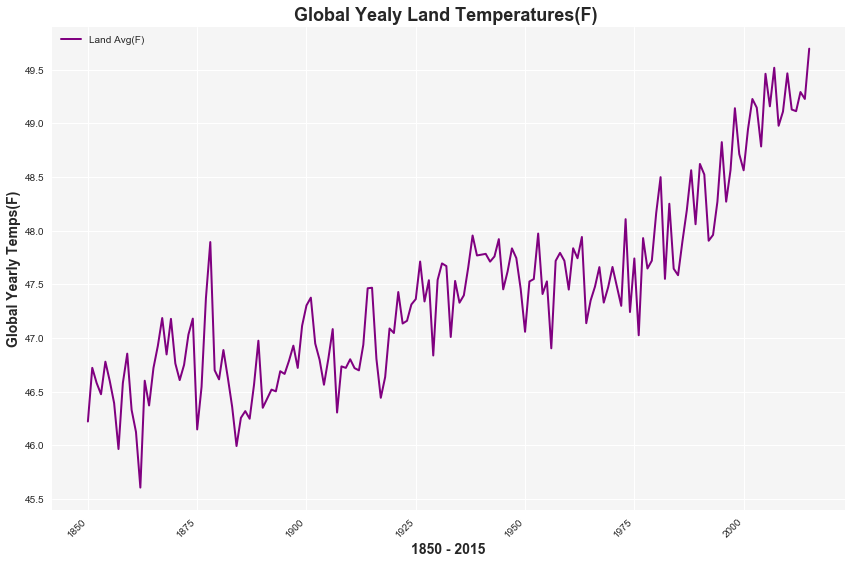

In [48]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = gllo_avg_df["year"]  
y1_axis = gllo_avg_df["ylylndavg_tmpf"]

ax.set_title("Global Yealy Land Temperatures(F) ",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2015",weight='bold').set_fontsize('14')
ax.set_ylabel("Global Yearly Temps(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="purple", linewidth= 2)

ax.legend(["Land Avg(F)"], loc="best")

plt.tight_layout()
plt.savefig("./images/global_1850-2015_yearly_land_avg_tempf.png")
plt.show()

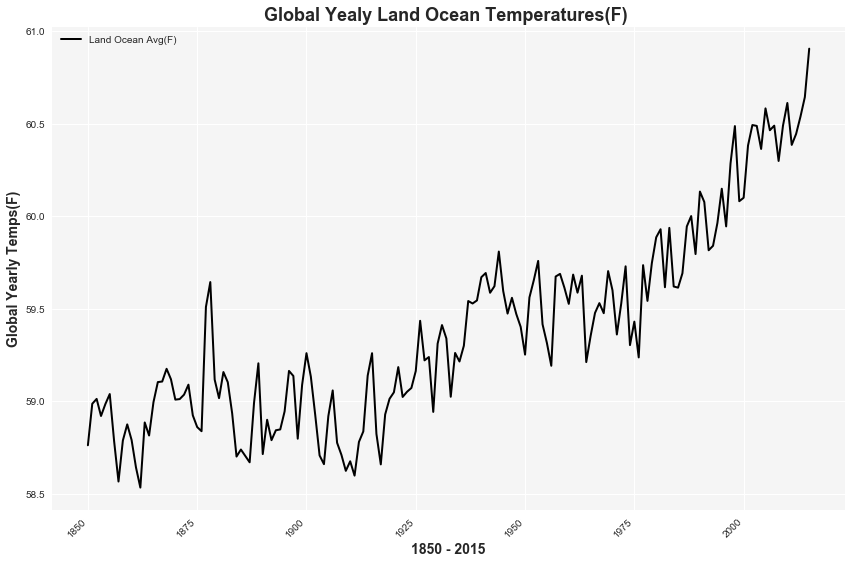

In [49]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = gllo_avg_df["year"]  
y1_axis = gllo_avg_df["ylylndocnavg_tmpf"]

ax.set_title("Global Yealy Land Ocean Temperatures(F) ",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2015",weight='bold').set_fontsize('14')
ax.set_ylabel("Global Yearly Temps(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="black", linewidth= 2)

ax.legend(["Land Ocean Avg(F)"], loc="best")

plt.tight_layout()
plt.savefig("./images/global_1850-2015_yearly_land_ocean_avg_tempf.png")
plt.show()

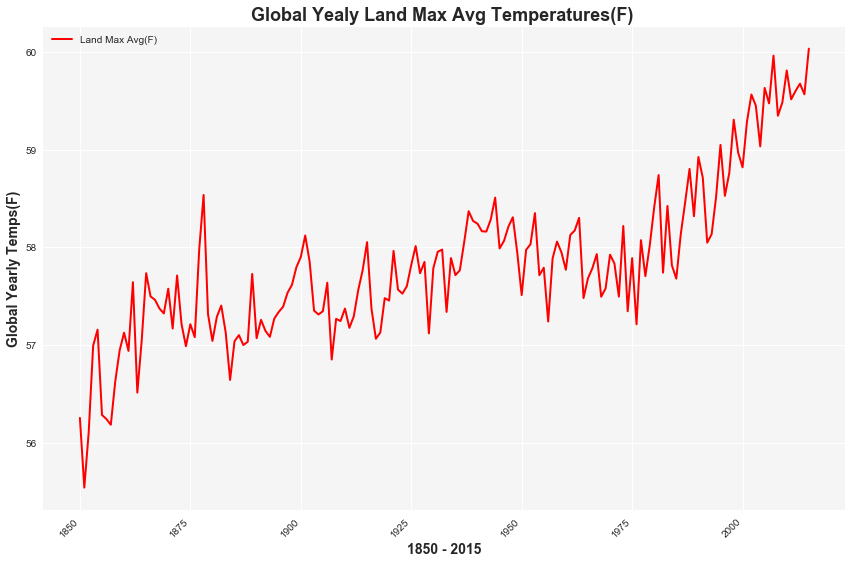

In [50]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = gllo_avg_df["year"]  
y1_axis = gllo_avg_df["ylylndmax_tmpf"]

ax.set_title("Global Yealy Land Max Avg Temperatures(F) ",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2015",weight='bold').set_fontsize('14')
ax.set_ylabel("Global Yearly Temps(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="red", linewidth= 2)

ax.legend(["Land Max Avg(F)"], loc="best")

plt.tight_layout()
plt.savefig("./images/global_1850-2015_yearly_land_max_avg_tempf.png")
plt.show()

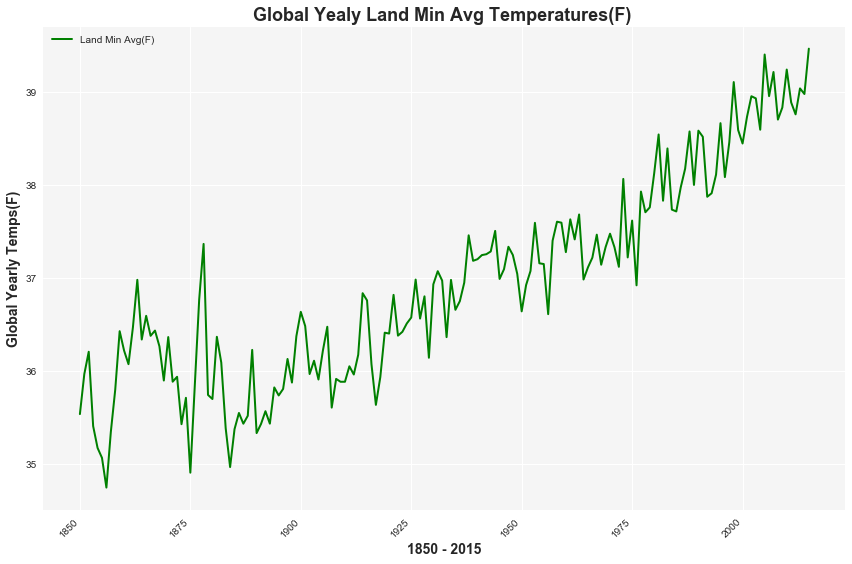

In [51]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = gllo_avg_df["year"]  
y1_axis = gllo_avg_df["ylylndmin_tmpf"]

ax.set_title("Global Yealy Land Min Avg Temperatures(F) ",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2015",weight='bold').set_fontsize('14')
ax.set_ylabel("Global Yearly Temps(F)",weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.plot(x_axis, y1_axis, color="green", linewidth= 2)

ax.legend(["Land Min Avg(F)"], loc="best")

plt.tight_layout()
plt.savefig("./images/global_1850-2015_yearly_land_min_avg_tempf.png")
plt.show()

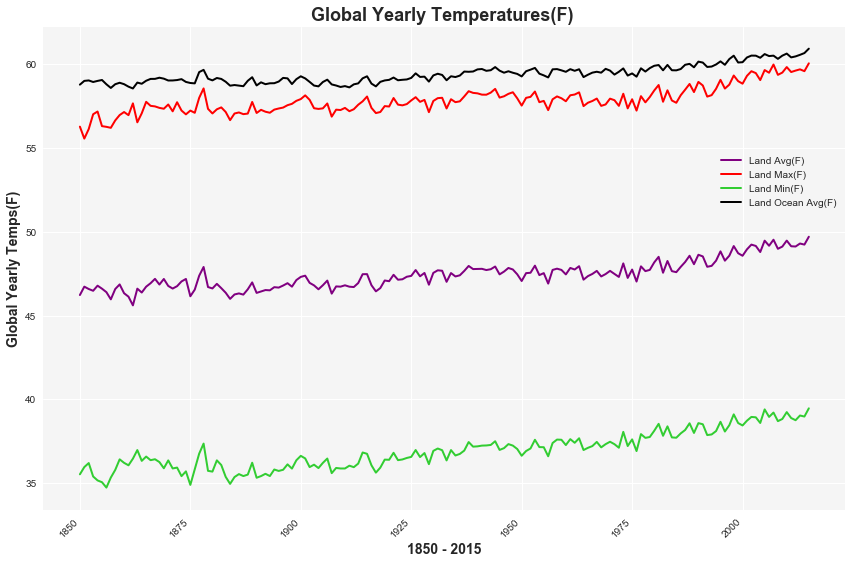

In [52]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, time
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_axis = gllo_avg_df["year"]  
y1_axis = gllo_avg_df["ylylndavg_tmpf"]
y2_axis = gllo_avg_df["ylylndmax_tmpf"]
y3_axis = gllo_avg_df["ylylndmin_tmpf"]
y4_axis = gllo_avg_df["ylylndocnavg_tmpf"]

ax.set_title("Global Yearly Temperatures(F) ",\
             weight='bold').set_fontsize('18')
ax.set_xlabel("1850 - 2015", weight='bold').set_fontsize('14')
ax.set_ylabel("Global Yearly Temps(F)", 
              weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.plot(x_axis, y1_axis, color="purple", linewidth= 2)
ax.plot(x_axis, y2_axis, color="red", linewidth= 2)
ax.plot(x_axis, y3_axis, color="limegreen", linewidth= 2)
ax.plot(x_axis, y4_axis, color="black", linewidth= 2)


ax.legend(["Land Avg(F)","Land Max(F)","Land Min(F)",
           "Land Ocean Avg(F)"], loc="best",
           bbox_to_anchor=(1, 0.75))

plt.tight_layout()
plt.savefig("./images/global_1850-2015_yearly_tempf.png")
plt.show()